In [22]:
import pandas as pd
import numpy as np

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1')

In [24]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [25]:
data.sample(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
35816,198810040009,1988,10,4,NaN,0,NaN,186,Sri Lanka,6,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
161150,201604140007,2016,4,14,NaN,1,NaN,113,Libya,10,...,NaN,"""Hosted Product: Libya Review Security Arab Ap...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
180388,201711110012,2017,11,11,NaN,0,NaN,228,Yemen,10,...,Casualty numbers conflict across sources. Foll...,"""Yemen: 23 al-Houthi militants killed in clash...","""Yemen: Security Roundup 2000 GMT 11 November ...",NaN,START Primary Collection,0,0,0,0,"201711110010, 201711110011, 201711110012"
67242,199712010004,1997,12,1,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,-9,-9,NaN
52903,199209080003,1992,9,8,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,PGIS,0,0,1,1,NaN


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [27]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
data.shape

(181691, 135)

In [29]:
columns=data.columns

In [30]:
columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [31]:
data['casualties']=data['nkill']+data['nwound']

## Statistics about the data

In [32]:
data['country_txt'].value_counts()

Iraq                              24636
Pakistan                          14368
Afghanistan                       12731
India                             11960
Colombia                           8306
Philippines                        6908
Peru                               6096
El Salvador                        5320
United Kingdom                     5235
Turkey                             4292
Somalia                            4142
Nigeria                            3907
Thailand                           3849
Yemen                              3347
Spain                              3249
Sri Lanka                          3022
United States                      2836
Algeria                            2743
France                             2693
Egypt                              2479
Lebanon                            2478
Chile                              2365
Libya                              2249
West Bank and Gaza Strip           2227
Syria                              2201


In [33]:
data['region_txt'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

In [35]:
data['gname'].value_counts()

Unknown                                               82782
Taliban                                                7478
Islamic State of Iraq and the Levant (ISIL)            5613
Shining Path (SL)                                      4555
Farabundo Marti National Liberation Front (FMLN)       3351
Al-Shabaab                                             3288
New People's Army (NPA)                                2772
Irish Republican Army (IRA)                            2671
Revolutionary Armed Forces of Colombia (FARC)          2487
Boko Haram                                             2418
Kurdistan Workers' Party (PKK)                         2310
Basque Fatherland and Freedom (ETA)                    2024
Communist Party of India - Maoist (CPI-Maoist)         1878
Maoists                                                1630
Liberation Tigers of Tamil Eelam (LTTE)                1606
National Liberation Army of Colombia (ELN)             1561
Tehrik-i-Taliban Pakistan (TTP)         

In [37]:
data['city'].value_counts()

Unknown              9775
Baghdad              7589
Karachi              2652
Lima                 2359
Mosul                2265
Belfast              2171
Santiago             1621
Mogadishu            1581
San Salvador         1558
Istanbul             1048
Athens               1019
Bogota                984
Kirkuk                925
Beirut                918
Medellin              848
Benghazi              840
Peshawar              819
Quetta                803
Guatemala City        755
Baqubah               745
Kabul                 738
Srinagar              658
Jerusalem             636
Paris                 612
Fallujah              582
Tripoli               565
Dhaka                 557
Rome                  551
Arish                 521
Ramadi                509
                     ... 
Hazmiyeh                1
Milpitas                1
Faqirabad Chowk         1
El Cocuy                1
Alicante district       1
Pashmul                 1
Cabayugan               1
Matuguinao  

In [38]:
data['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

In [39]:
data['targtype1_txt'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

In [42]:
data['targsubtype1_txt'].value_counts()

Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
Village/City/Town/Suburb                                    6542
Politician or Political Party Movement/Meeting/Rally        6306
Police Building (headquarters, station, school)             5907
Military Barracks/Base/Headquarters/Checkpost               5211
Police Patrol (including vehicles and convoys)              5105
Government Building/Facility/Office                         4802
Retail/Grocery/Bakery                                       4274
Electricity                                                 4198
Bank/Commerce                                               3242
House/Apartment/Residence                                   3044
School/University/Educati

In [44]:
print('Country with Highest Terrorist Attacks:',data['country_txt'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',data['region_txt'].value_counts().index[0])
print('Maximum people killed in an attack are:',data['nkill'].max(),'that took place in',data.loc[data['nkill'].idxmax()].country_txt)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


In [46]:
data['iyear'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

In [47]:
data['natlty1_txt'].value_counts()

Iraq                                  24113
Pakistan                              13900
India                                 12098
Afghanistan                           10931
Colombia                               7922
Philippines                            6685
Peru                                   5840
El Salvador                            5212
United States                          5065
Turkey                                 4636
Israel                                 4097
Thailand                               3804
Nigeria                                3759
Northern Ireland                       3367
Somalia                                3160
Yemen                                  3123
Spain                                  3096
France                                 2918
Sri Lanka                              2851
International                          2699
Algeria                                2664
Egypt                                  2523
Russia                          

In [48]:
print("Nationality of the maximally targetted group is:", data['natlty1_txt'].value_counts().index[0])

Nationality of the maximally targetted group is: Iraq


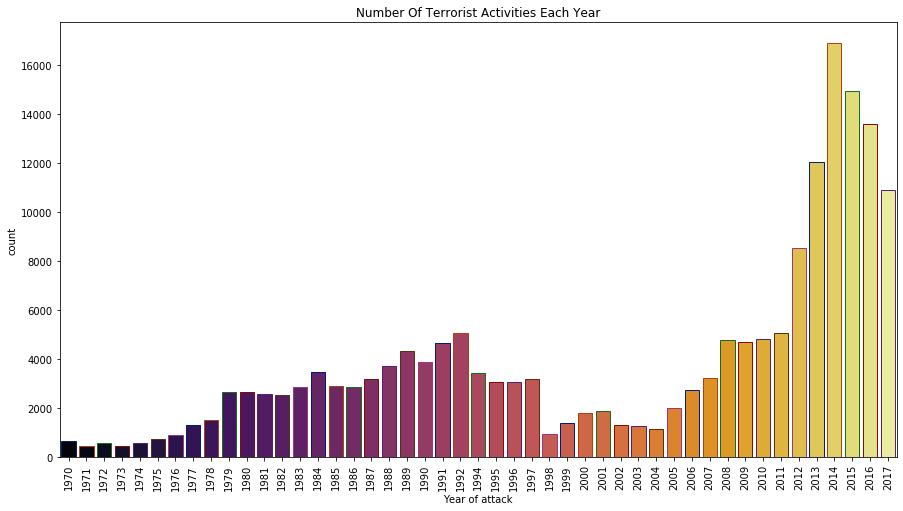

In [55]:
plt.subplots(figsize=(15,8))
sns.countplot('iyear',data=data,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

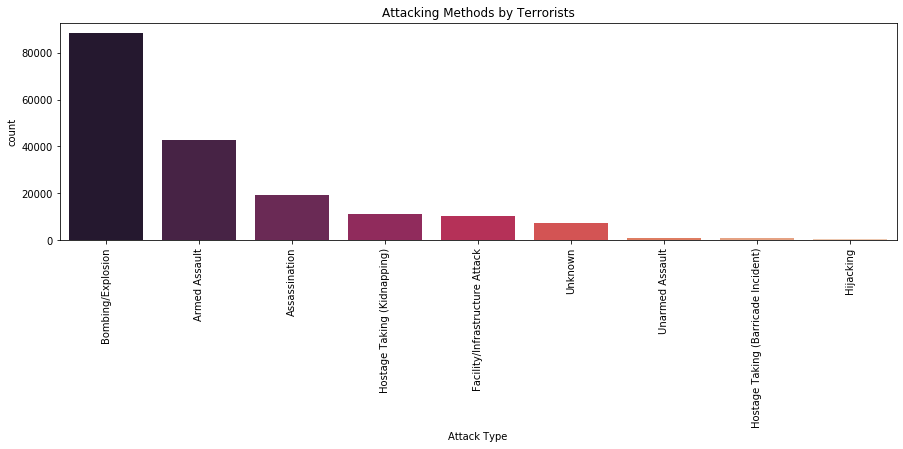

In [57]:
plt.subplots(figsize=(15,4))
sns.countplot('attacktype1_txt',data=data,palette='rocket',order=data['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.title('Attacking Methods by Terrorists')
plt.show()


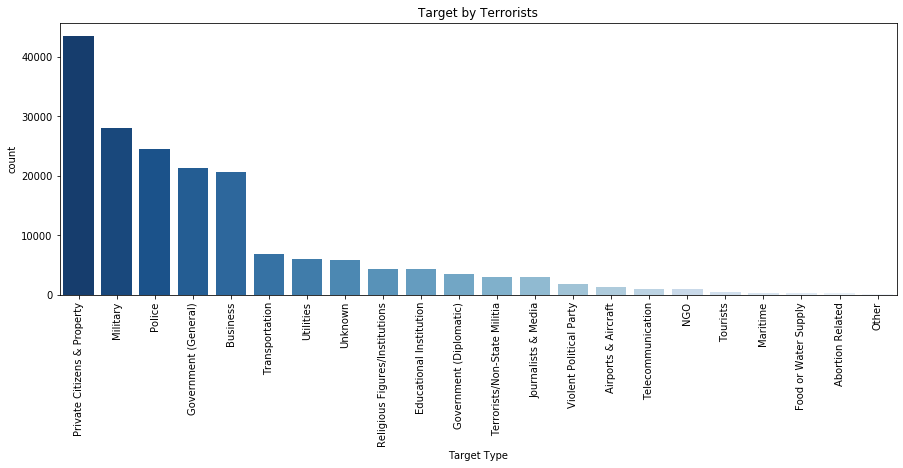

In [61]:
plt.subplots(figsize=(15,5))
sns.countplot('targtype1_txt',data=data,palette='Blues_r',order=data['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Target Type')
plt.title('Target by Terrorists')
plt.show()

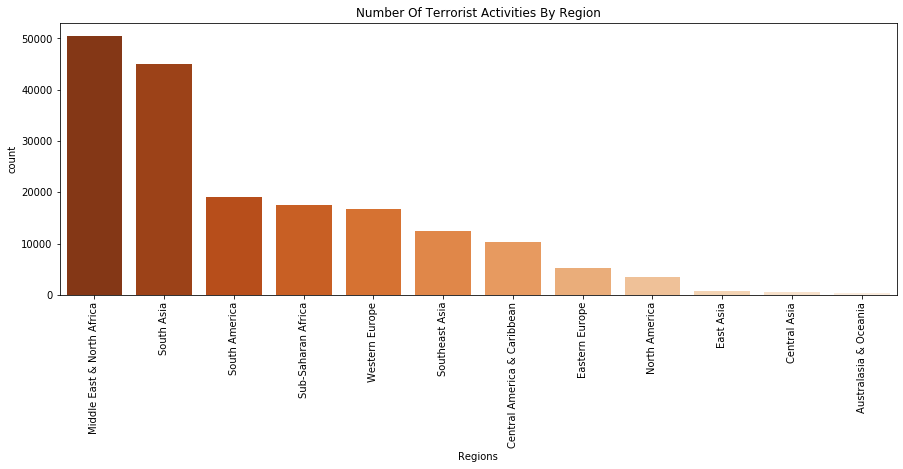

In [64]:
plt.subplots(figsize=(15,5))
sns.countplot('region_txt',data=data,palette='Oranges_r',order=data['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

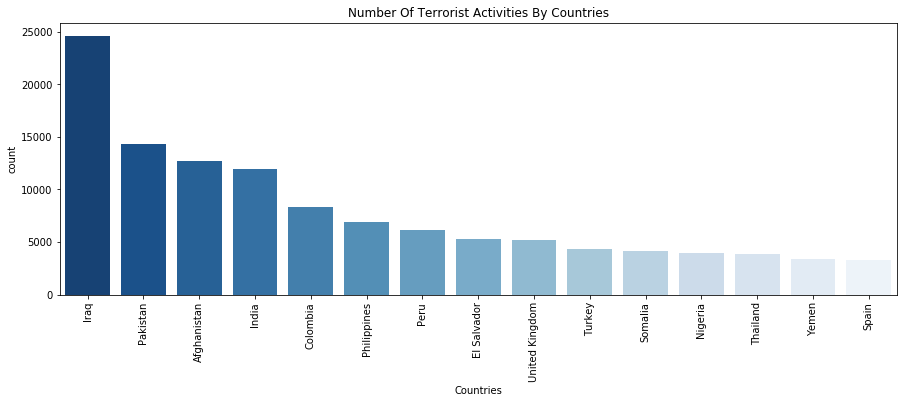

In [67]:
plt.subplots(figsize=(15,5))
sns.countplot('country_txt',data=data,palette='Blues_r',order=data['country_txt'].value_counts()[:15].index)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.title('Number Of Terrorist Activities By Countries')
plt.show()

## Therefore the hotzones of terrorism in terms of region are 1.Middle East.  2) North Africa & 3)South Asia
## Therefore the hotzones of terrorism in terms of Country are IRAQ, PAKISTAN, AFGHANISTAN, and INDIA